In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sys 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')

In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning

In [1]:
setup_df        =   SetupDataFrame()
analyze_df      =   AnalyzeDataFrame()
visualize_df    =   VisualizeDataFrame()
eval_model      =   EvalModel()
hp_tuning_model =   HyperParameterTuning()

NameError: name 'SetupDataFrame' is not defined

In [4]:
df = setup_df.setup_ml(file_dir="9-loan_risk_svm.csv")

In [5]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['credit_score_fluctuation', 'recent_transaction_volume', 'loan_risk'], dtype='object')
***************************** First 5 Data in the Dataframe ******************************
   credit_score_fluctuation  recent_transaction_volume  loan_risk
0                 -1.439860                   1.283010          1
1                 -0.276571                  -1.232382          0
2                  1.312047                   0.955097          1
3                  1.020706                   0.089485          0
4                  1.513729                   0.580520          1
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fl

In [6]:
cat_cols, num_cols, cat_but_car_cols = analyze_df.grab_col_names(df)

Observations: 1000
Variables: 3
cat_cols: 1
num_cols: 2
cat_but_car: 0
num_but_cat: 1

Categorical Cols: ['loan_risk']

Numerical Cols: ['credit_score_fluctuation', 'recent_transaction_volume']

Categorical but cardinal Cols: []


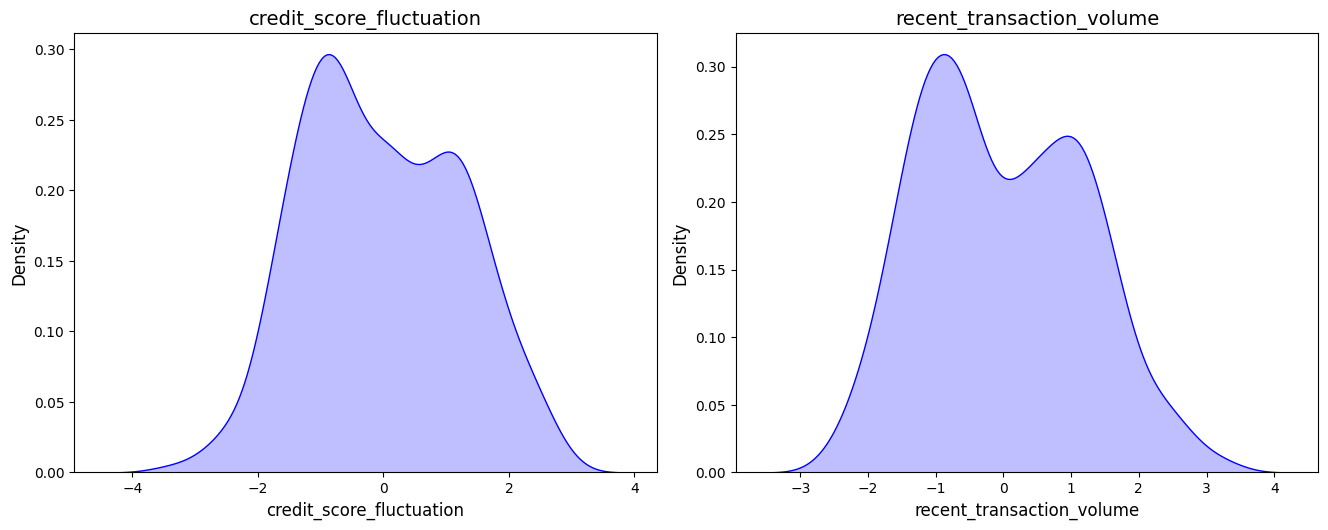

In [7]:
visualize_df.subplot_maker(df, num_cols)

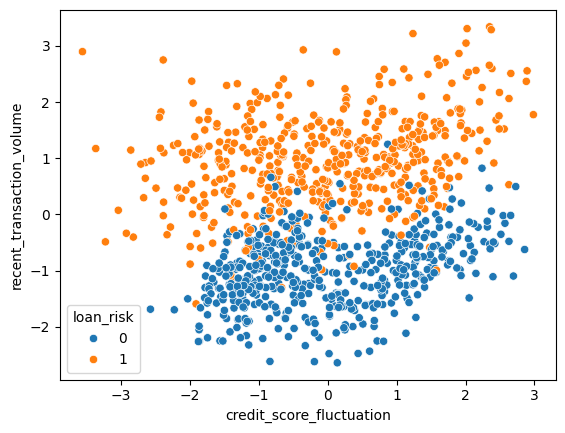

In [8]:
visualize_df.scatterplot_maker(df, data_x="credit_score_fluctuation", 
                               data_y="recent_transaction_volume", 
                               data_hue="loan_risk")

In [9]:
X = df.drop("loan_risk", axis=1)
y = df["loan_risk"]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVC

model = SVC()

keys = ["C", "kernel", "gamma"]
values = [[0.1, 1, 10, 100, 1000], ["linear", "poly", "rbf", "sigmoid"], ["scale", "auto"]]

params_dict = hp_tuning_model.create_params_dict(keys, values)

In [15]:
params_dict

{'C': [0.1, 1, 10, 100, 1000],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto']}

In [16]:
hp_tuning_model.grid_search(model, X_train, y_train, params_dict)

(np.float64(0.9375), {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'})

In [17]:
hp_tuning_model.randomized_search(model, params_dict, X_train, y_train)

(np.float64(0.9349999999999999), {'kernel': 'rbf', 'gamma': 'auto', 'C': 100})